In [1]:
# Importando as bibliotecas necessárias
import numpy as np
import pandas as pd
from sklearn import datasets

# Carregando o dataset Iris
iris = datasets.load_iris()

# Extraindo os dados e criando um DataFrame
X = iris.data  # Características (features)
y = iris.target  # Classes (target)
feature_names = iris.feature_names
target_names = iris.target_names

# Criando um DataFrame para melhor visualização
df = pd.DataFrame(X, columns=feature_names)
df['species'] = [target_names[i] for i in y]

# Visualizando as primeiras linhas do dataset
print("Primeiras linhas do dataset Iris:")
print(df.head())

Primeiras linhas do dataset Iris:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  


Vamos ver a média, desvio padrão, valores máximos e mínimos de cada característica:


In [2]:
# Estatísticas descritivas do DataFrame
print("Estatísticas descritivas:")
print(df.describe())


Estatísticas descritivas:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  


Vamos ver quantas flores temos de cada espécie:




In [3]:
# Contagem de flores por espécie
print("\nDistribuição das espécies:")
print(df['species'].value_counts())



Distribuição das espécies:
species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


Agora vamos visualizar os dados com gráficos. Precisamos importar o matplotlib e o seaborn, que são bibliotecas para gráficos.



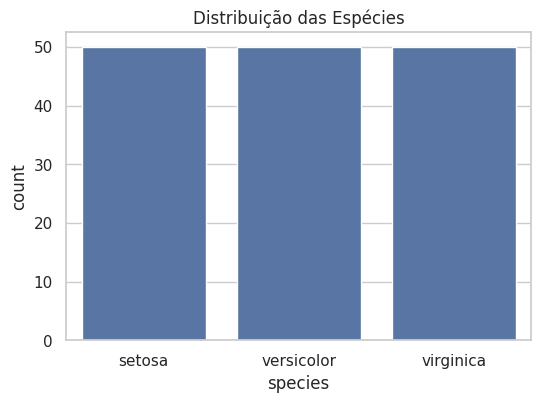

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ajustar estilo dos gráficos
sns.set(style="whitegrid")

# Gráfico de contagem de espécies
plt.figure(figsize=(6, 4))
sns.countplot(x='species', data=df)
plt.title("Distribuição das Espécies")
plt.show()


Vamos usar o pairplot do seaborn para ver gráficos de dispersão entre todas as combinações de colunas:

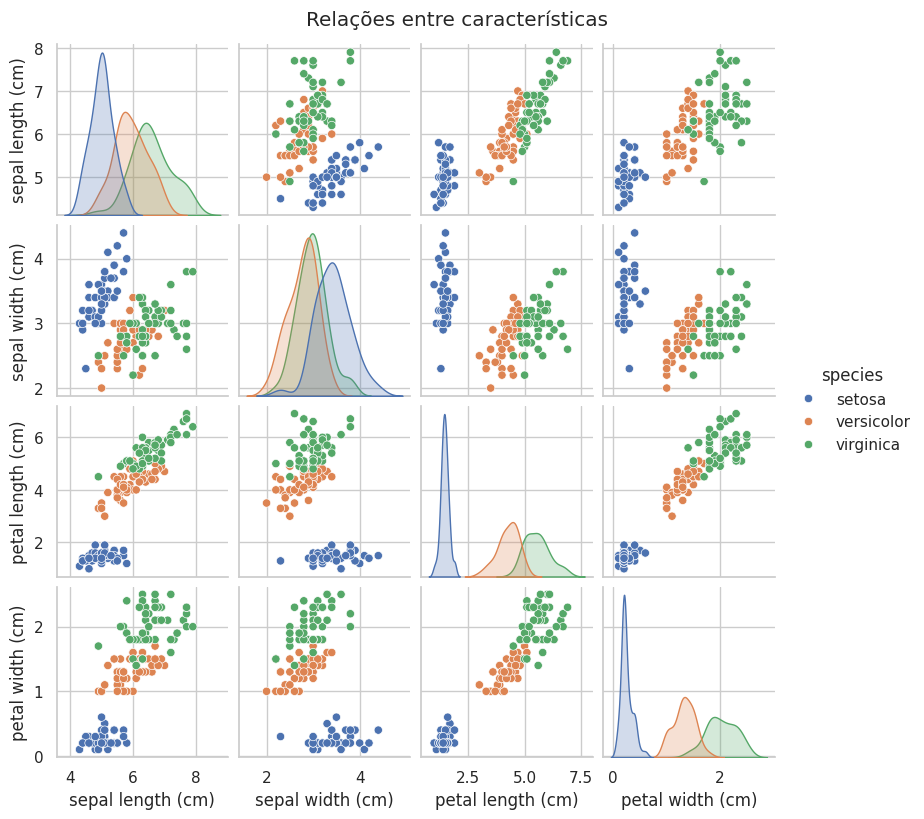

In [6]:
# Visualizando a relação entre as características
sns.pairplot(df, hue='species', diag_kind='kde', height=2)
plt.suptitle("Relações entre características", y=1.02)
plt.show()


O que isso mostra?

Como as medidas (como comprimento da pétala) se relacionam.

Mostra se espécies diferentes têm características bem separadas ou não.

Agoras vamos preparar os dados para o treinamento
Isso significa dividir o dataset em dois grupos:

Treinamento (para o modelo aprender)

Teste (para ver se ele aprendeu bem)

Vamos usar o train_test_split do sklearn:

In [7]:
from sklearn.model_selection import train_test_split

# Separando as características (X) e o alvo (y)
X = df[iris.feature_names]
y = df['species']

# Dividindo em 70% treino e 30% teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Tamanho do conjunto de treino:", X_train.shape)
print("Tamanho do conjunto de teste:", X_test.shape)


Tamanho do conjunto de treino: (105, 4)
Tamanho do conjunto de teste: (45, 4)


Escolher um algoritmo de classificação
Vamos usar o KNN (K-Nearest Neighbors), que é simples e muito bom para esse tipo de problema.

🔹 Treinar o modelo KNN:


In [8]:
from sklearn.neighbors import KNeighborsClassifier

# Criando o modelo KNN com k=3
knn = KNeighborsClassifier(n_neighbors=3)

# Treinando o modelo
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

🔹 Fazer previsões:


In [9]:
# Fazendo previsões no conjunto de teste
y_pred = knn.predict(X_test)


🔹 Avaliar o desempenho:


In [10]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Acurácia
print("Acurácia:", accuracy_score(y_test, y_pred))

# Relatório de classifi
print("\nRelatório de classificação:")
print(classification_report(y_test, y_pred))

# Matriz de confusão
print("\nMatriz de confusão:")
print(confusion_matrix(y_test, y_pred))


Acurácia: 1.0

Relatório de classificação:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45


Matriz de confusão:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
